In [36]:
from keras.optimizers import Adam
from keras.models import load_model
import os
from PIL import Image
from keras.applications.inception_v3 import preprocess_input
from skimage import io
from model import *
from utils import *
from config import *
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from scipy.misc import fromimage
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import InputLayer
from utils import prepare_data
from keras.utils import Sequence
import numpy as np
import types


from keras import backend as K

# maybe useful imports for other Sequence child classes:
# from skimage.io import imread
from skimage.transform import resize
import tqdm

from numpy import (amin, amax, ravel, asarray, cast, arange, ones, newaxis,
                   transpose, iscomplexobj, uint8, issubdtype, array)

DEFAULT_IMAGE_DIRECTORY     = '2D-Seq/'
data_dir    = '2D-Seq/'
IMAGE_DIRECTORY = ''
IMG_SIZE = 310


print("Tensorflow Version ",tf.__version__, 
      "Keras Version",
      keras.__version__)

Tensorflow Version  1.12.0 Keras Version 2.2.4


In [2]:
model_file = ("checkpoints/gen.hdf5")
#load the model
model = load_model(model_file)

/home/pandoora/anaconda3/envs/mi/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [3]:
model.input.shape

TensorShape([Dimension(None), Dimension(10), Dimension(240), Dimension(240), Dimension(4)])

In [4]:
outputs = [layer.output for layer in model.layers]  
outputs

[<tf.Tensor 'input_1:0' shape=(?, 10, 240, 240, 4) dtype=float32>,
 <tf.Tensor 'time_distributed_1/Reshape_1:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'activation_1/Tanh:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_2/Reshape_1:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_3/Reshape_1:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'leaky_re_lu_1/LeakyRelu:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_4/Reshape_1:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_5/Reshape_1:0' shape=(?, 10, 120, 120, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_6/Reshape_1:0' shape=(?, 10, 120, 120, 48) dtype=float32>,
 <tf.Tensor 'leaky_re_lu_2/LeakyRelu:0' shape=(?, 10, 120, 120, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_7/Reshape_1:0' shape=(?, 10, 120, 120, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_8/Reshape_1:0' shape=(?, 10, 60, 6

In [5]:
sequences = prepare_data("2D-Seq/test/*")

In [6]:
#preprocess the data
for s in range(len(sequences)):
    sequenceee = sequences[s]
    x,y = load(sequenceee, 10)    
    if s == 10:
        break

In [8]:
len(x)

146

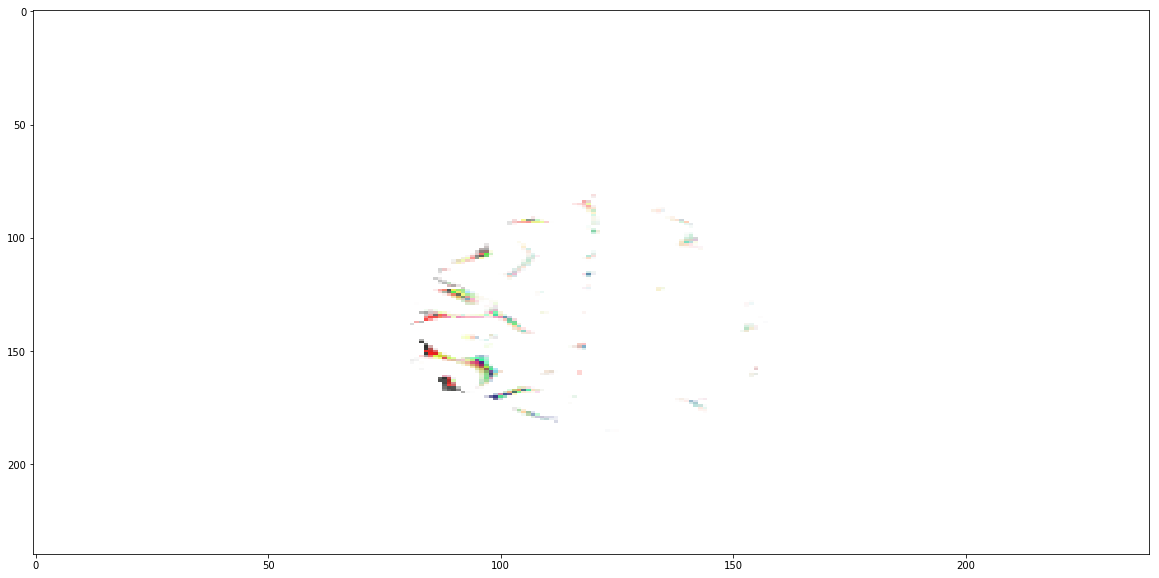

In [37]:
#After the preprocess
plt.rcParams["figure.figsize"] = (20,10)
plt.imshow(x[33][0][0],aspect='auto')

In [23]:
def get_layer_names():
    layer_names = []
    for layer in model.layers:      
        if 'time_distributed' in layer.name:
            pass
            layer_names.append(layer.name)    
    return layer_names

layer_names = get_layer_names()

In [46]:
#Get the Features
inp = model.input                                           
outputs = [layer.output for layer in model.layers]  
print(outputs)

[<tf.Tensor 'input_1:0' shape=(?, 10, 240, 240, 4) dtype=float32>,
 <tf.Tensor 'time_distributed_1/Reshape_1:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'activation_1/Tanh:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_2/Reshape_1:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_3/Reshape_1:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'leaky_re_lu_1/LeakyRelu:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_4/Reshape_1:0' shape=(?, 10, 240, 240, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_5/Reshape_1:0' shape=(?, 10, 120, 120, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_6/Reshape_1:0' shape=(?, 10, 120, 120, 48) dtype=float32>,
 <tf.Tensor 'leaky_re_lu_2/LeakyRelu:0' shape=(?, 10, 120, 120, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_7/Reshape_1:0' shape=(?, 10, 120, 120, 48) dtype=float32>,
 <tf.Tensor 'time_distributed_8/Reshape_1:0' shape=(?, 10, 60, 6

In [25]:
o = []
for ln in layer_names:
    o.append(model.get_layer(ln).output)    

In [26]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=o)


In [27]:
#get the Features
p = intermediate_layer_model.predict(x[25])

In [43]:
#get the Segmentation
m = model.predict(x[25])

In [45]:
m.shape

(1, 576000, 4)

In [28]:
p[0].shape

(1, 10, 240, 240, 48)

In [29]:
len(p)

28

In [30]:
np.mean(p[0][0][0], axis=2).shape

(240, 240)

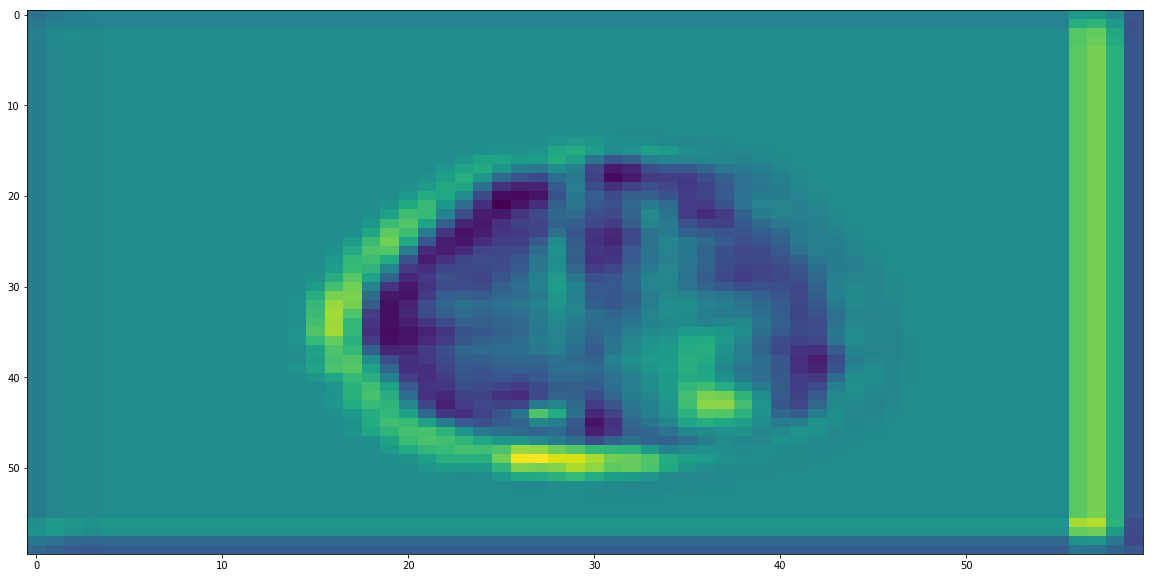

In [38]:
#print(len(p))
#p[0].shape
plt.imshow(np.mean(p[9][0][0], axis=2),aspect='auto')

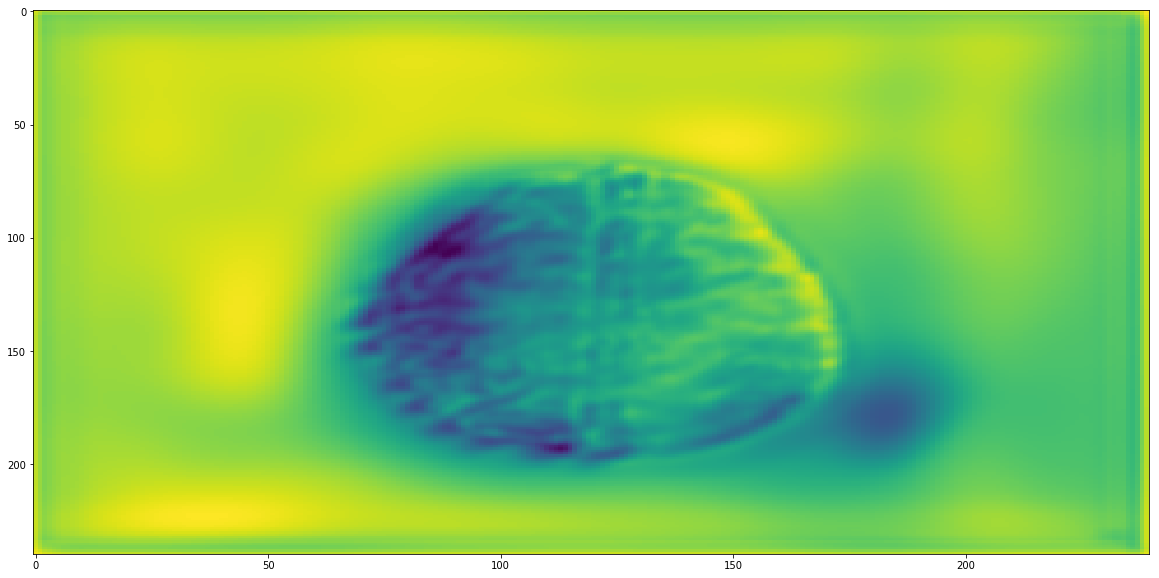

In [39]:
plt.imshow(np.mean(p[25][0][0], axis=2),aspect='auto')

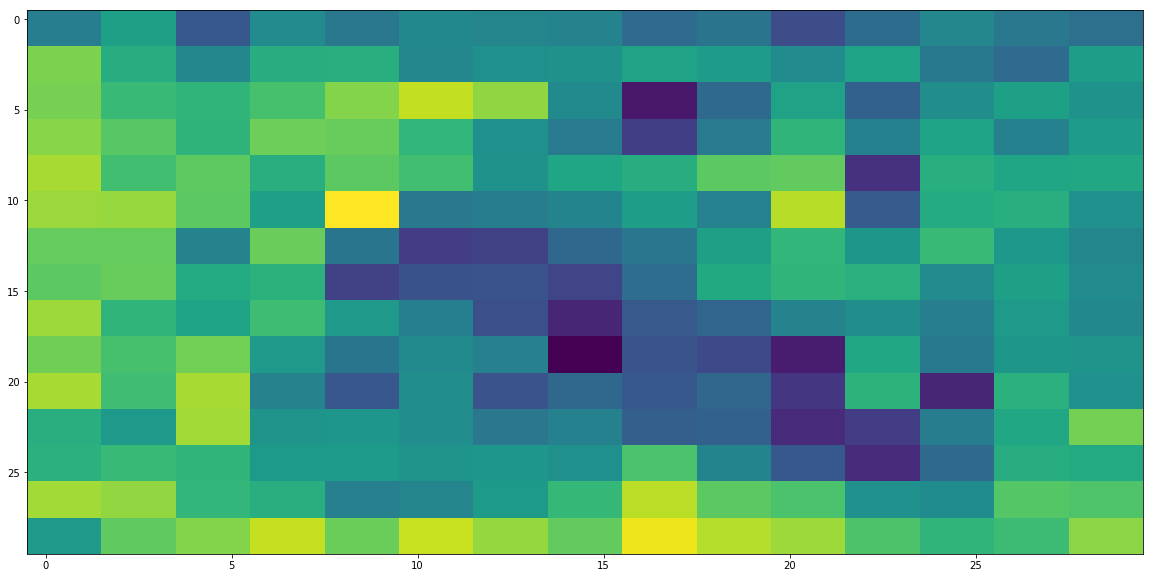

In [40]:
plt.imshow(np.mean(p[15][0][0], axis=2),aspect='auto')

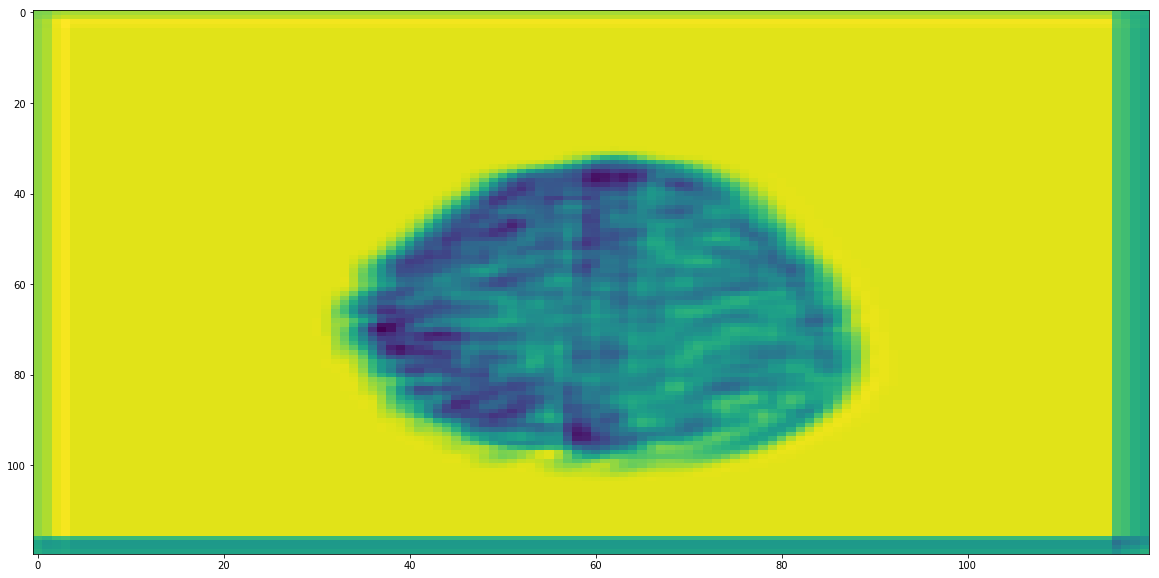

In [41]:
plt.imshow(np.mean(p[5][0][0], axis=2),aspect='auto')

## First Layer Channel 5

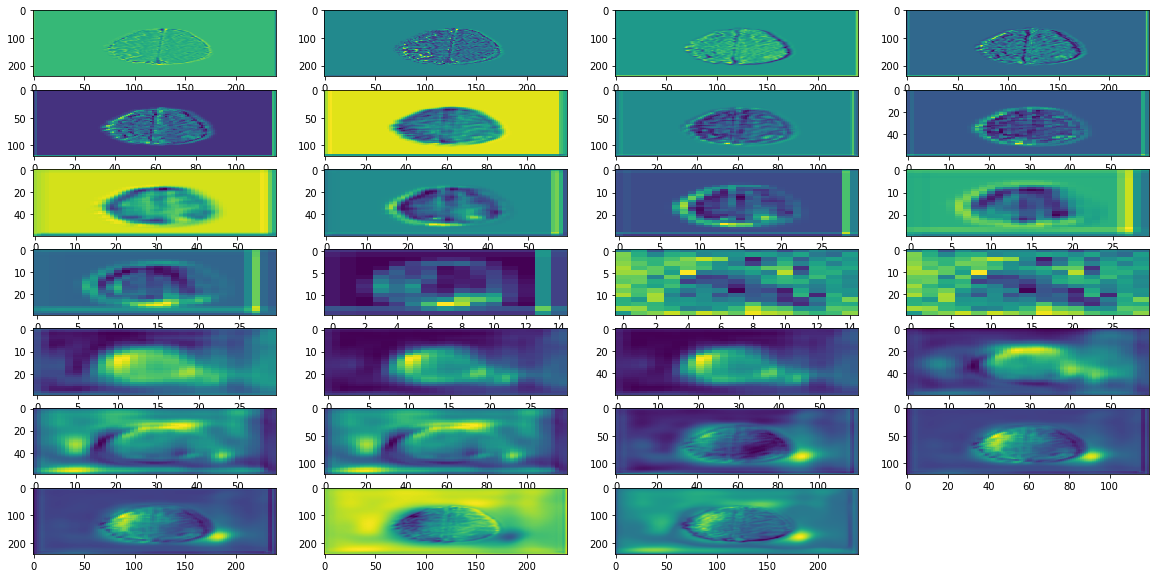

In [42]:

oFig1 = plt.figure(1)
oFig1.add_subplot(7,4,1) 
plt.imshow(np.mean(p[0][0][0],       axis=2),aspect='auto')
oFig1.add_subplot(7,4,2)
plt.imshow(np.mean(p[1][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,3)
plt.imshow(np.mean(p[2][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,4)
plt.imshow(np.mean(p[3][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,5)
plt.imshow(np.mean(p[4][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,6)
plt.imshow(np.mean(p[5][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,7)
plt.imshow(np.mean(p[6][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,8)
plt.imshow(np.mean(p[7][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,9)
plt.imshow(np.mean(p[8][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,10)
plt.imshow(np.mean(p[9][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,11) 
plt.imshow(np.mean(p[10][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,12)
plt.imshow(np.mean(p[11][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,13)
plt.imshow(np.mean(p[12][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,14)
plt.imshow(np.mean(p[13][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,15)
plt.imshow(np.mean(p[14][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,16)
plt.imshow(np.mean(p[15][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,17)
plt.imshow(np.mean(p[16][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,18)
plt.imshow(np.mean(p[17][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,19)
plt.imshow(np.mean(p[18][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,20)
plt.imshow(np.mean(p[19][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,21) 
plt.imshow(np.mean(p[20][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,22)
plt.imshow(np.mean(p[21][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,23)
plt.imshow(np.mean(p[22][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,24)
plt.imshow(np.mean(p[23][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,25)
plt.imshow(np.mean(p[24][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,26)
plt.imshow(np.mean(p[25][0][0][:,:,:], axis=2),aspect='auto')
oFig1.add_subplot(7,4,27)
plt.imshow(np.mean(p[26][0][0][:,:,:], axis=2),aspect='auto')

